In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

df = pd.read_csv("NCAAGames2.csv")

instances = []
labels = []

for i in range(0, df.shape[0]):
    instances.append(df.loc[i].tolist()[9:109])
    labels.append(df.loc[i].tolist()[8])

instances_train = instances[0:15344]
labels_train = labels[0:15344]
instances_val = instances[15344:18632]
labels_val = labels[15344:18632]
instances_test = instances[18632:len(instances)]
labels_test = labels[18632:len(labels)]

0.7371463340432005


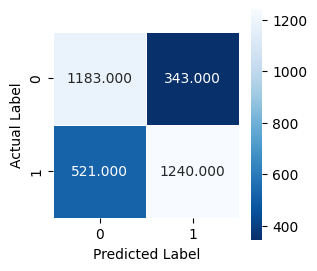

In [10]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(random_state=1, activation='tanh', hidden_layer_sizes=100).fit(instances_test, labels_test)
print(clf_nn.score(instances_test, labels_test))

cm = metrics.confusion_matrix(clf_nn.predict(instances_test), labels_test)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

0.742013994523882


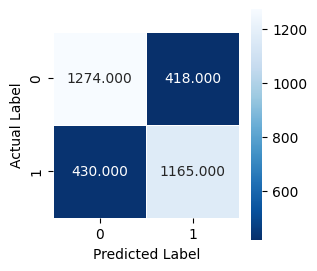

In [9]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=900, C=0.006).fit(instances_train, labels_train) # validated
print(clf_lr.score(instances_test, labels_test))

cm = metrics.confusion_matrix(clf_lr.predict(instances_test), labels_test)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()


0.7380590203833283


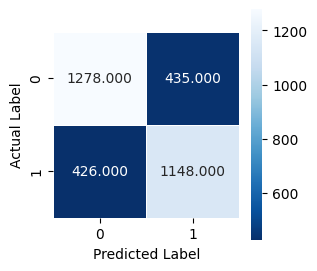

In [3]:
from sklearn import svm
clf_svm = svm.SVC(C=0.4).fit(instances_train, labels_train) # validated
print(clf_svm.score(instances_test, labels_test))

cm = metrics.confusion_matrix(clf_svm.predict(instances_test), labels_test)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()